## General Overview

-------------


The main goal of this research is to build and compare a few models to predict the housing prices in Ames, Iowa(USA). The data is sourced from Kaggle website: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data. It contains housing data - 2919 records in total - where 1460 will be used for training purposes and 1459 for testing our models. There are 4 separate files which we are going to use:

- train.csv -> training data in CSV format
- test.csv -> testing data in CSV format
- data_description.txt -> attributes description

Let's start off by importing the necessary modules and reading the file.

In [1]:
# Basic modules for dataframe manipulation
import numpy as np
import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype

# Plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine learning

from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

# Data Standardization
from sklearn.preprocessing import StandardScaler

# Cross Validaton
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Metrics
from sklearn.metrics import mean_absolute_error

# Don't display warnings 
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read files into a dataframe
df_train = pd.read_csv('train.csv', low_memory = False)
df_test = pd.read_csv('test.csv', low_memory = False)

# Merge training and testing datasets
df_raw = pd.concat([df_train.drop('SalePrice', axis = 1), df_test])
print("Number of records: {}\nNumber of variables: {}".format(df_raw.shape[0], df_raw.shape[1]))

Number of records: 2919
Number of variables: 80


It is important to look at the data first in order to understand its format, structure, value types, number(percentage) of missing data, etc.

In [3]:
# Change the default number of columns displayed by DataFrame's head method
pd.set_option('display.max_columns', 85)

# Display first 5 rows
df_raw.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


As we can see, our dataset consists of various data types: integers, floats, strings so let's check further what are they exact types, but before doing so, we will change column headings to lower case.

In [4]:
# Import 'lower_cols' function from helper module which will convert column headings to lower case
from helper import lower_cols

lower_cols(df_raw)

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
id               2919 non-null int64
mssubclass       2919 non-null int64
mszoning         2915 non-null object
lotfrontage      2433 non-null float64
lotarea          2919 non-null int64
street           2919 non-null object
alley            198 non-null object
lotshape         2919 non-null object
landcontour      2919 non-null object
utilities        2917 non-null object
lotconfig        2919 non-null object
landslope        2919 non-null object
neighborhood     2919 non-null object
condition1       2919 non-null object
condition2       2919 non-null object
bldgtype         2919 non-null object
housestyle       2919 non-null object
overallqual      2919 non-null int64
overallcond      2919 non-null int64
yearbuilt        2919 non-null int64
yearremodadd     2919 non-null int64
roofstyle        2919 non-null object
roofmatl         2919 non-null object
exterior1st      2918 non-

According to the above result, strings representing categorical variables are stored as objects, which is very unefficient due to the increased size and processing time so we will have to convert their data type into "category".

## Data preprocessing


-------------------------------------

Data pre-processing is a critical step that needs to be taken to convert the raw data into a clean data set which is a requirement of the Machine Learning algorithms. The common steps are:

- Cleaning: removal or fixing missing data
- Formatting: adjusting the type of each column and making them suitable for machine learning algorithms


### Cleaning

We have seen above that some variables have missing data which makes them unusable with Machine Learning algorithms. To fix this problem, we have to get rid of variables which have more than 75% of the data missing. For remaining columns, we will apply the following imputation methods: median for continuous variables and mode for categorical ones. Median is usually more preferable to mean, because of negligible impact of outliers.

In [5]:
# Select and print missing values ratio in descending order
missing = df_raw.isnull().sum().sort_values(ascending=False)/len(df_raw)
print(missing)

poolqc           0.996574
miscfeature      0.964029
alley            0.932169
fence            0.804385
fireplacequ      0.486468
lotfrontage      0.166495
garagecond       0.054471
garagequal       0.054471
garageyrblt      0.054471
garagefinish     0.054471
garagetype       0.053786
bsmtcond         0.028092
bsmtexposure     0.028092
bsmtqual         0.027749
bsmtfintype2     0.027407
bsmtfintype1     0.027064
masvnrtype       0.008222
masvnrarea       0.007879
mszoning         0.001370
bsmthalfbath     0.000685
utilities        0.000685
functional       0.000685
bsmtfullbath     0.000685
bsmtfinsf1       0.000343
exterior1st      0.000343
exterior2nd      0.000343
bsmtfinsf2       0.000343
bsmtunfsf        0.000343
totalbsmtsf      0.000343
saletype         0.000343
                   ...   
yearbuilt        0.000000
overallcond      0.000000
salecondition    0.000000
heating          0.000000
exterqual        0.000000
extercond        0.000000
yrsold           0.000000
mosold      

In [6]:
# Copy all columns containing less then 75% of missing values to new variable: 'df
df = df_raw.loc[:, missing < 0.75]

### Formatting

In this section, we are going to convert object data types into category, impute missing values and take a closer look at all variables. Instead of iterating through all variables individually, we will work on certain data types using for loops to ease and speed up the whole process - this will be handled by functions stored in "helper.py" module since converting data and imputing missing values in common in every Data Science - related problem. These actions will result in a clean dataframe object, which then could be used for modelling.

In [7]:
# Import helper functions which are used to speed up the preprocessing
from helper import obj_to_cat, fill_missing_nums, fill_missing_cats

In [8]:
# Convert objects(strings) into category data type
df = obj_to_cat(df)

In [9]:
# Fill missing numerical data with median
df = fill_missing_nums(df)

In [10]:
# Fill missing categorical data with mode
df = fill_missing_cats(df)

# Check if the functions worked as intended
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 76 columns):
id               2919 non-null int64
mssubclass       2919 non-null int64
mszoning         2919 non-null category
lotfrontage      2919 non-null float64
lotarea          2919 non-null int64
street           2919 non-null category
lotshape         2919 non-null category
landcontour      2919 non-null category
utilities        2919 non-null category
lotconfig        2919 non-null category
landslope        2919 non-null category
neighborhood     2919 non-null category
condition1       2919 non-null category
condition2       2919 non-null category
bldgtype         2919 non-null category
housestyle       2919 non-null category
overallqual      2919 non-null int64
overallcond      2919 non-null int64
yearbuilt        2919 non-null int64
yearremodadd     2919 non-null int64
roofstyle        2919 non-null category
roofmatl         2919 non-null category
exterior1st      2919 non-null cate

#### Displaying exemplary columns

In [11]:
# Import 'display_cols' function from helper module to display columns of desired data type
from helper import display_cols

In [12]:
# Display 10 random rows of variables with category data type
display_cols(df, type = 'category', num_samples = 10)

,mszoning,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfintype2,heating,heatingqc,centralair,electrical,kitchenqual,functional,fireplacequ,garagetype,garagefinish,garagequal,garagecond,paveddrive,saletype,salecondition
234,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,SLvl,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,BuiltIn,RFn,TA,TA,Y,WD,Normal
1301,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,BrkCmn,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1107,RL,Pave,IR3,HLS,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Ex,Gd,No,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,BuiltIn,RFn,TA,TA,Y,New,Partial
1429,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,BrkFace,Gd,Gd,CBlock,Gd,TA,No,BLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
231,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
1429,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,BrkTil,TA,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,Fa,Typ,Gd,Detchd,Unf,TA,TA,N,WD,Normal
976,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,PosN,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,CBlock,TA,TA,No,ALQ,BLQ,GasA,Gd,Y,SBrkr,TA,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Normal
1187,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,Gable,CompShg,Plywood,Plywood,None,TA,TA,CBlock,Gd,TA,No,ALQ,BLQ,GasA,Gd,Y,SBrkr,TA,Typ,Po,Attchd,RFn,TA,TA,Y,WD,Normal
141,RM,Pave,Reg,HLS,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,BrkTil,TA,TA,Mn,BLQ,Unf,GasA,Fa,Y,SBrkr,TA,Typ,Gd,Detchd,Unf,TA,TA,Y,COD,Normal
488,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Wd Sdng,BrkFace,Gd,TA,CBlock,Gd,Gd,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,Ex,Attchd,RFn,TA,TA,Y,WD,Normal


In [13]:
# Display 10 random rows of variables with float data type
display_cols(df, type = 'float', num_samples = 10)

,lotfrontage,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,bsmtfullbath,bsmthalfbath,garageyrblt,garagecars,garagearea
898,50.0,0.0,0.0,0.0,630.0,630.0,0.0,0.0,1980.0,1.0,283.0
1250,93.0,0.0,1065.0,0.0,1045.0,2110.0,1.0,0.0,1968.0,2.0,522.0
993,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1957.0,1.0,384.0
900,68.0,0.0,322.0,0.0,536.0,858.0,0.0,0.0,1979.0,1.0,684.0
823,21.0,265.0,0.0,0.0,672.0,672.0,0.0,0.0,1973.0,1.0,264.0
1037,68.0,396.0,0.0,0.0,1055.0,1055.0,0.0,0.0,2001.0,2.0,905.0
691,85.0,0.0,1035.0,0.0,545.0,1580.0,1.0,0.0,1979.0,0.0,0.0
331,83.0,295.0,384.0,0.0,996.0,1380.0,0.0,0.0,1963.0,1.0,364.0
645,68.0,0.0,282.0,35.0,664.0,981.0,1.0,0.0,1979.0,2.0,576.0
278,32.0,0.0,0.0,0.0,1376.0,1376.0,0.0,0.0,2004.0,3.0,704.0


In [14]:
# Display 10 random rows of variables with int64 data type
display_cols(df, type = 'int64', num_samples = 10)

,id,mssubclass,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold
474,475,120,5330,8,5,2000,2000,1652,0,0,1652,2,0,2,1,6,0,96,48,0,0,0,0,0,8,2007
56,57,160,2645,8,5,1999,2000,983,756,0,1739,2,1,3,1,7,0,115,0,0,0,0,0,0,8,2009
657,2118,50,6000,6,5,1939,1950,874,468,0,1342,2,0,2,2,7,1,0,0,0,0,0,0,0,4,2008
284,1745,20,15417,7,5,1981,1981,1740,0,0,1740,1,1,2,1,7,0,228,20,218,0,0,0,0,6,2009
1090,1091,90,8544,3,4,1950,1950,1040,0,0,1040,2,0,2,2,6,0,0,0,0,0,0,0,0,6,2009
762,2223,20,23730,7,5,1996,1997,2032,0,0,2032,3,0,3,1,7,0,0,46,192,0,0,0,0,9,2008
509,510,20,9600,5,6,1959,1959,1041,0,0,1041,1,0,3,1,6,0,224,88,0,0,0,0,0,7,2009
1258,1259,80,9587,7,5,2005,2005,1166,0,0,1166,2,0,2,1,5,0,212,0,0,0,0,0,0,7,2008
766,767,60,10421,7,5,1988,1988,980,734,0,1714,2,1,3,1,7,1,228,66,156,0,0,0,500,3,2010
861,2322,20,3710,7,5,2007,2007,1266,0,0,1266,2,0,2,1,6,1,100,16,0,0,0,0,0,8,2007


In [15]:
# Import 'display_nums_stats' function from helper module to display the basic statistics of numerical columns
from helper import display_nums_stats

display_nums_stats(df)

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.088386,10168.114080,6.089072,5.564577,1971.312778,1984.264474,101.396026,441.398253,49.565262,560.739979,1051.756252,1159.581706,336.483727,4.694416,1500.759849,0.429599,0.061322,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.161699,1.766701,472.877013,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,842.787043,42.517628,21.317898,7886.996359,1.409947,1.113131,30.291442,20.894344,178.854579,455.534750,169.179104,439.471764,440.692234,392.362079,428.701456,46.396825,506.051045,0.524676,0.245608,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,24.868576,0.761506,215.357944,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,730.500000,20.000000,60.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.500000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2189.500000,70.000000,78.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,163.500000,733.000000,0.000000,805.000000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


Two things that should bring our attention here:

- Id variable is made of ordinal numbers representing an equivalent of dataframe's index + 1 and can be deleted without having any negative impact on our model

- Some values look suspicious hence we need to take a closer look at them and detect the outliers (only these from the 'training' dataset)

In [16]:
# Delete 'Id' column 
df.drop(['id'], axis = 1, inplace = True)

In [17]:
# Import 'nominalnums_to_cat' function from helper module
from helper import nominalnums_to_cat

# Convert nominal numerical variables(having less than 30 unique values) into categories and return names of these which have more than 8 unique values for further check
cats_to_verify = nominalnums_to_cat(df, unique_values_split = 30, boundary = 8)

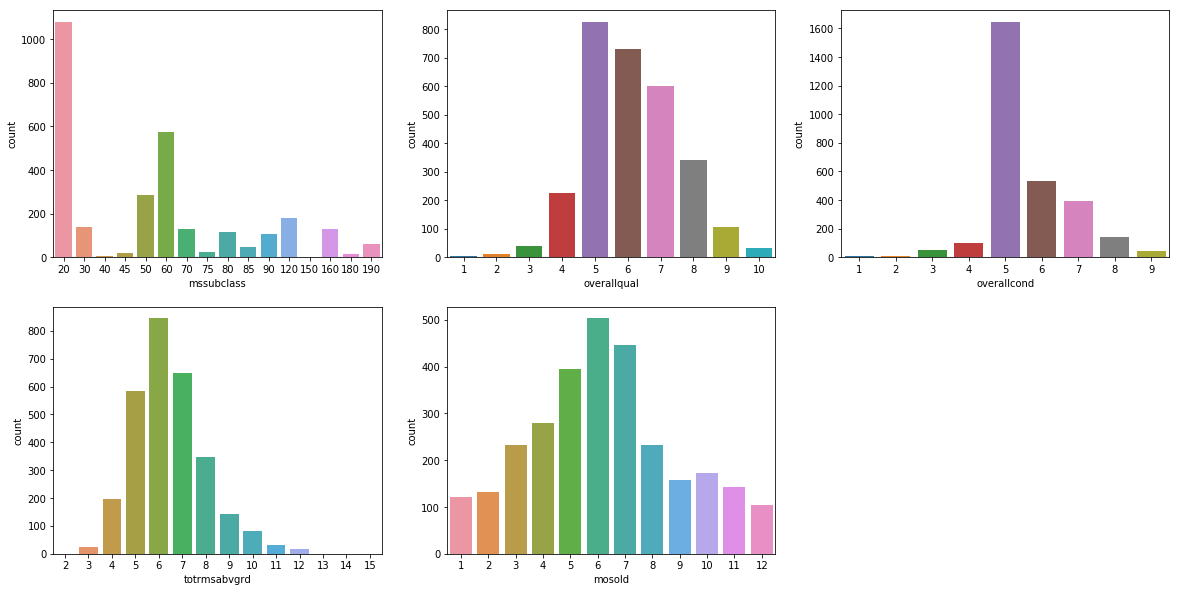

In [18]:
# Import 'plot_categoricals' function from helper module
from helper import plot_categoricals

# Display count plots for columns returned by 'nominalnums_to_cat' function to verify their values 
plot_categoricals(df, cats_to_verify, kind = 'count')

In the above charts we can see that most of the houses have 4 to 9 rooms and overall quality and condition scores between 5 to 8. Also, it's worth pointing out that most of the houses were sold between March and August. This should not be surprising, as it is much easier to relocate when the weather conditions are more favorable. According to the 'mssubclass' attribute, most of the houses are 1 and 2-story buildings built in 1946 or later. 

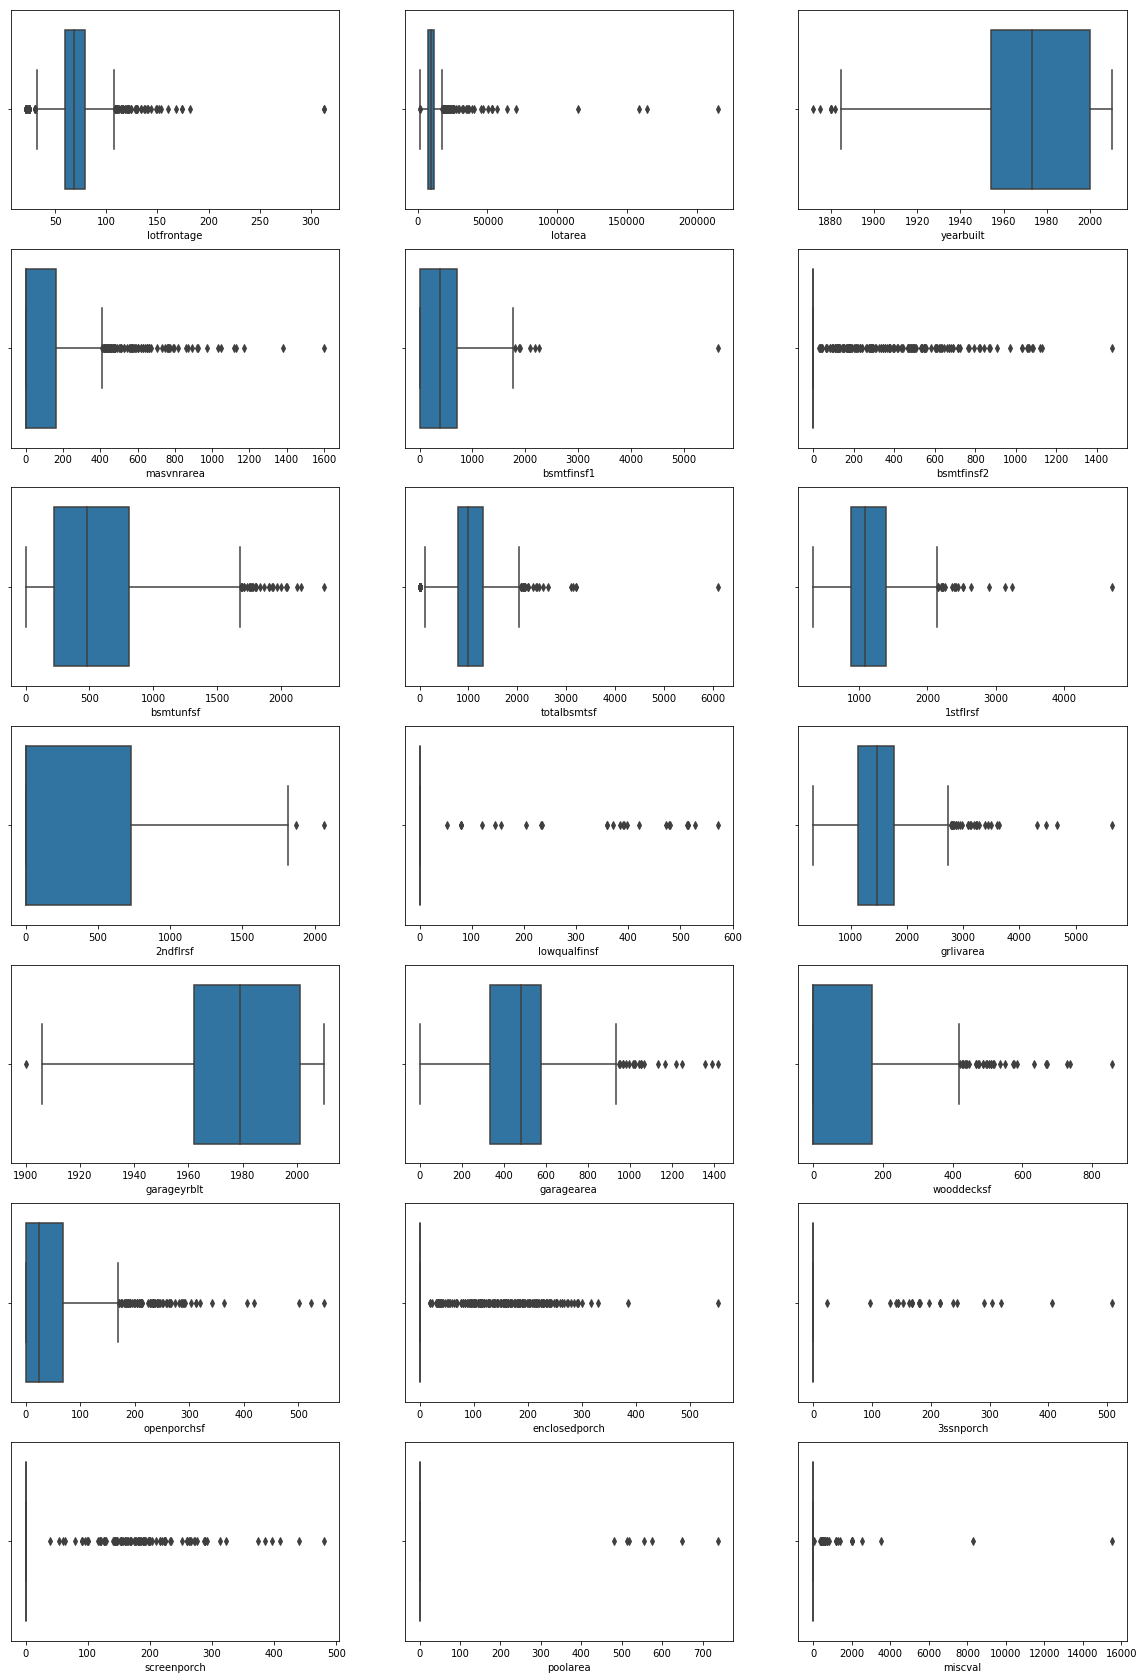

In [28]:
# Import 'outliers_by_col' function from helper module to find outliers in numerical columns( based on Tukey's Interquartile Range ). We are looking for outliers only in the training set as it will be used for training our models. Function will plot box plots for suspicious columns.
from helper import outliers_by_col

train_last_idx = 1460 

outliers = outliers_by_col(df[:train_last_idx], multiplier = 1.5, plot_results = True, outliers_dictionary = False)